<a href="https://colab.research.google.com/github/yagnik99/Funds-Prediction-for-a-Startup/blob/main/Yagnik_Pandya_Capstone_Project_4_Startup_Funding_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predict whether a startup will get funded in the next three months. </u></b>

## <b> Problem Description </b>

### There has been a staggering growth in investments in young age startups in the last 5 years. A lot of big VC firms are increasingly getting interested in the startup funding space. You are given a task to predict whether a startup will get a funding in the next three months using app traction data and startup details. 

### This funding can be either seed funding, Series A, Series B, so on and so forth. 


## <b> Data Description </b>

### In the file, you have monthly data for the startup entities which contains information about various app traction performance.

### <b> In the given data, you have the following variables:
* ### UUID - Unique Identifier for a single startup entity
* ### Month - Month for which the app data is available
* ### Application category - The category to which an application belongs to
* ### Avg Session Time - Average time of the session in app during the month
* ### Total Session Time - Avg session time / user x Open rate = Total session time
* ### Open_rate - No of times app has been opened by a user
* ### Reach - % of devices having the app installed
* ### Funding_ind - Indicator for a funded startup

## <b>Following variables are only available for funded startups:</b>
* ### Business models -  The business model of the startup                            
* ### City - the city where the startup is based out of
* ### Company Stage - the stage of the company
* ### Feed name - 
* ### Founded year - The year in which the startup was founded
* ### Latest funded date - The latest date in which the startup was funded
* ### MAU - % of reach which opened the app in the given month( Monthly Active Users)
* ### Overview - Overview of the startup
* ### Practice Areas - 
* ### Region - Region where the startup operates
* ### Total Funding - Total amount of funding till the month
* ### Uninstall Rate - Rate of uninstall of applications.



In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
folder = '/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 4/Capstone Project 4/data/'

In [ ]:
O_data = pd.read_csv(folder + 'data_driven_investment_1.csv')

In [ ]:
O_data.head(3)

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind
0,c1ad38e2d357610c129657d870ede902e8abfcb9,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042963,National,NaN,NaN,0.024443,0
1,d841e670d9191f896a0cbc75961920887b375756,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003244,National,NaN,NaN,0.009828,0
2,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000161,National,NaN,NaN,0.235294,0


In [ ]:
# Shape of Original Dataset
O_data.shape

(1502175, 20)

In [ ]:
O_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502175 entries, 0 to 1502174
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   UUID                  1500693 non-null  object 
 1   month                 1502175 non-null  int64  
 2   Application Category  1502175 non-null  object 
 3   Avg_Session_Time      877732 non-null   float64
 4   Business Models       2414 non-null     object 
 5   City                  2407 non-null     object 
 6   Company Stage         2414 non-null     object 
 7   Feed Name             2414 non-null     object 
 8   Founded Year          2414 non-null     float64
 9   Latest Funded Date    2414 non-null     object 
 10  MAU                   118087 non-null   float64
 11  Open_Rate             877715 non-null   float64
 12  Overview              2414 non-null     object 
 13  Practice Areas        2414 non-null     object 
 14  Reach                 1050875 non-

In [ ]:
#Count of Funded Startups
O_data['funding_ind'].value_counts()

0    1499761
1       2414
Name: funding_ind, dtype: int64

In [ ]:
# Checking for duplicates
len(O_data[O_data.duplicated()])

89412

In [ ]:
#Droping Duplicates
O_data.drop_duplicates(inplace=True)

In [ ]:
O_data.isna().sum()

UUID                        969
month                         0
Application Category          0
Avg_Session_Time         535031
Business Models         1410459
City                    1410466
Company Stage           1410459
Feed Name               1410459
Founded Year            1410459
Latest Funded Date      1410459
MAU                     1294676
Open_Rate                535048
Overview                1410459
Practice Areas          1410459
Reach                    451300
Region                        0
Total Funding (USD)     1410605
Total_Session_Time       535098
Uninstall_Rate          1060560
funding_ind                   0
dtype: int64

###Checking where there is no UUID and droping those if no funds recieved as it will be of no use. 

In [ ]:
# Where UUID is null
len(O_data[O_data['UUID'].isna()])

969

In [ ]:
# Subset of data where UUID is not null
O_data = O_data[O_data['UUID'].notna()]

In [ ]:
# Duration of Data
print(O_data['month'].min(),'- start')
print(O_data['month'].max(), '- end')

20180701 - start
20200601 - end


In [ ]:
# Copy of Data for future use
data = O_data.copy()

In [ ]:
# Features that are only for funded Start up
Funded_features = ['Business Models', 'City', 'Company Stage', 'Feed Name', 'Founded Year', 'Latest Funded Date', 'MAU', 'Overview', 'Practice Areas', 'Total Funding (USD)', 'Uninstall_Rate']

In [ ]:
data.drop(Funded_features, axis = 1, inplace=True)

In [ ]:
data.shape

(1411794, 9)

In [ ]:
data.isna().sum()

UUID                         0
month                        0
Application Category         0
Avg_Session_Time        534728
Open_Rate               534745
Reach                   450918
Region                       0
Total_Session_Time      534795
funding_ind                  0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1411794 entries, 0 to 1502174
Data columns (total 9 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   UUID                  1411794 non-null  object 
 1   month                 1411794 non-null  int64  
 2   Application Category  1411794 non-null  object 
 3   Avg_Session_Time      877066 non-null   float64
 4   Open_Rate             877049 non-null   float64
 5   Reach                 960876 non-null   float64
 6   Region                1411794 non-null  object 
 7   Total_Session_Time    876999 non-null   float64
 8   funding_ind           1411794 non-null  int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 107.7+ MB


### Many null values in above so will try to find out if there is any pattern of those missing values.

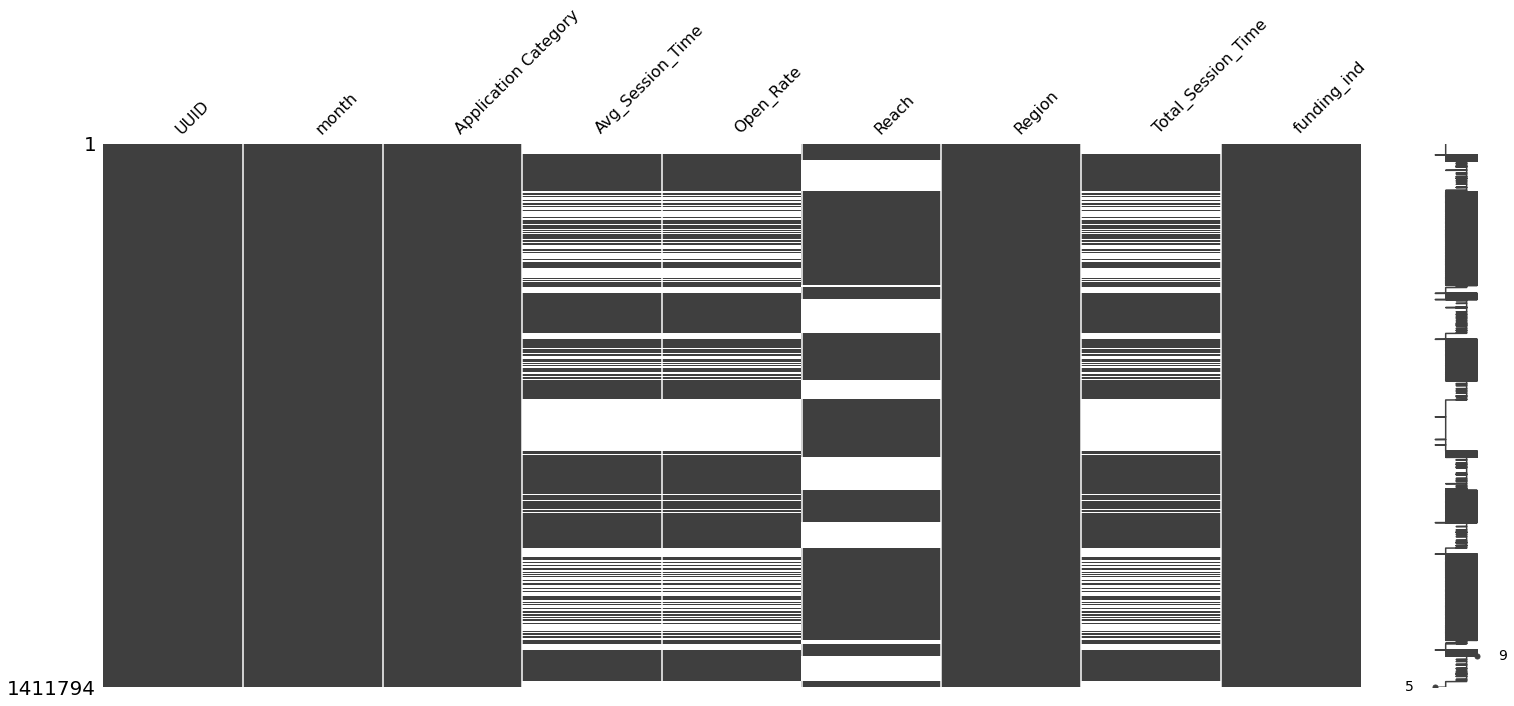

In [ ]:
# Identifying patter in missing values
import missingno as msno
msno.matrix(data)

In [ ]:
data['Year'] = data['month'].apply(lambda x : (int(str(x)[:4])))
data['Month'] = data['month'].apply(lambda x : (int(str(x)[4:6])))
#data['Day'] = data['month'].apply(lambda x : (int(str(x)[6:])))   - All are of 1st day of month

In [ ]:
data.drop(['Region'], axis=1, inplace = True)

In [ ]:
# Subset of funded statups for EDA
Funded = data[data['funding_ind']==1]

In [ ]:
# Subset of Non Funded startups for EDA
Non_funded = data[data['funding_ind']==0]

In [ ]:
# Impute missing values
def fill_missing(dataframe):
  new_data = pd.DataFrame(columns=dataframe.columns)              # First will impute missing values with forward and back fill.
  Category_list = dataframe['Application Category'].value_counts().index.to_list()
  years = dataframe['Year'].value_counts().index.to_list()
  for i in Category_list:
    temp = dataframe[dataframe['Application Category']==i]
    for y in years:
      temp1 = temp[temp['Year']==y]
      temp1.fillna(method='ffill', limit = 2, inplace = True)
      temp1.fillna(method='backfill', limit = 1, inplace = True)
      new_data = pd.concat([new_data, temp1])
  
  new_data_1 = pd.DataFrame(columns=dataframe.columns)            # Remaining imputed with mean of category and year.
  for i in Category_list:
    temp = new_data[new_data['Application Category']==i]
    for y in years:
      temp1 = temp[temp['Year']==y]
      temp1.fillna(temp1.mean(), inplace = True)
      new_data_1 = pd.concat([new_data_1, temp1])

  Final_data = pd.DataFrame(columns=dataframe.columns)            # Still remaining imputed with mean of whole category.
  for i in Category_list:
    temp = new_data_1[new_data_1['Application Category']==i]
    temp.fillna(temp.mean(), inplace = True)
    Final_data = pd.concat([Final_data, temp])

  return Final_data

In [ ]:
# Removing missing values in funded
Funded = fill_missing(Funded)

In [ ]:
# Removing missing values in Non funded
Non_funded = fill_missing(Non_funded)

In [ ]:
# Filling rest missing values with overall mean
Funded.fillna(Funded.mean(), inplace = True)

In [ ]:
Final_data = pd.concat([Funded, Non_funded])

In [ ]:
Final_data.shape

(1411794, 10)

In [ ]:
# Saving data sets for future easy use purpose
Final_data.to_csv(folder + 'Final_dataset.csv', index= False)
Funded.to_csv(folder + 'Funded_dataset.csv', index= False)
Non_funded.to_csv(folder + 'Non_funded_dataset.csv', index= False)

In [ ]:
# Importing saved DF
#Funded_df = pd.read_csv(folder + 'Funded_dataset.csv')
#Non_funded_df = pd.read_csv(folder + 'Non_funded_dataset.csv')

In [ ]:
Final_df = pd.read_csv(folder + 'Final_dataset.csv')

In [ ]:
Final_df.shape

(1411794, 10)

In [ ]:
Final_df.drop_duplicates(['UUID', 'month', 'Application Category', 'funding_ind'], inplace = True)

In [ ]:
Final_df.shape

(945184, 10)

In [ ]:
Funded_df = Final_df[Final_df['funding_ind']==1]
Non_funded_df = Final_df[Final_df['funding_ind']==0]

##**EDA**

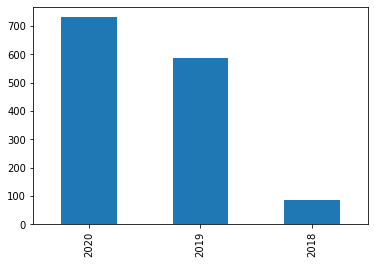

In [ ]:
#Trend of recieving funds
Funded_df['Year'].value_counts().plot(kind='bar')

In [ ]:
# Startups that has never recieved funds
never_funded = list(set(Non_funded_df['Application Category'].value_counts().index.to_list()) - set(Funded_df['Application Category'].value_counts().index.to_list()))
never_funded

['Music',
 'Art & Design',
 'Word',
 'Events',
 'Dating',
 'Casino',
 'Libraries & Demo']

Text(0.5, 1.0, 'Top 10 categories')

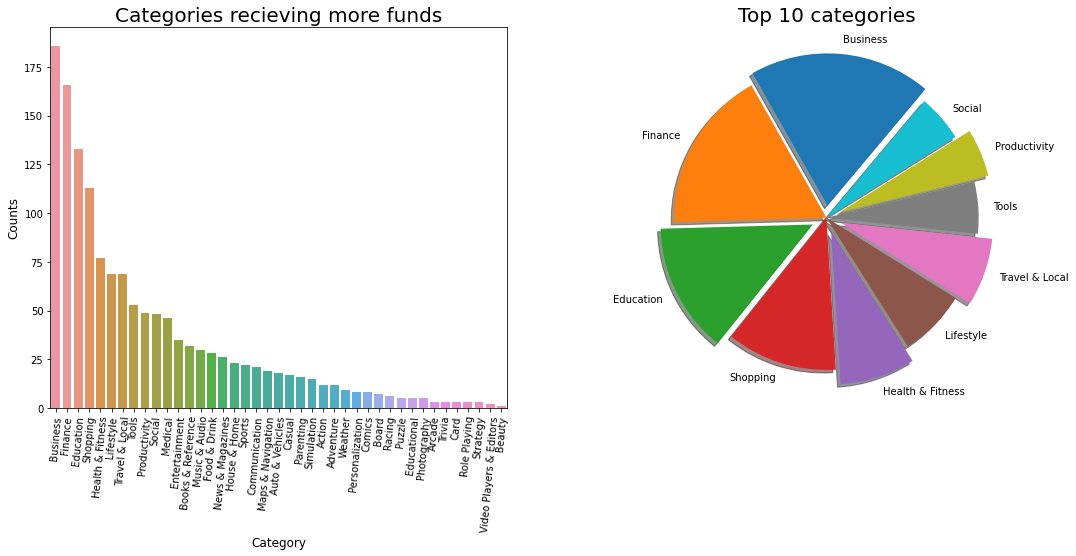

In [ ]:
# Category recieving more funds
plt.rcParams['figure.figsize'] = (18, 7)

a = pd.DataFrame(Funded_df['Application Category'].value_counts())
ax1 = plt.subplot(121)
sns.barplot(x=a.index, y= a['Application Category'] )
plt.xlabel('Category', fontsize = 12)
plt.xticks(rotation=85)
plt.ylabel('Counts', fontsize = 12)
ax1.set_title('Categories recieving more funds', fontsize = 20)

ax2 = plt.subplot(122)
explode =(0.08,0,0.1,0, 0.1,0,0.1,0, 0.1, 0)
plt.pie(a.sort_values(['Application Category'], ascending=False).head(10), labels=a.sort_values(['Application Category'], ascending=False).head(10).index, startangle=50, shadow = True, explode = explode)
ax2.set_title('Top 10 categories', fontsize = 20) 

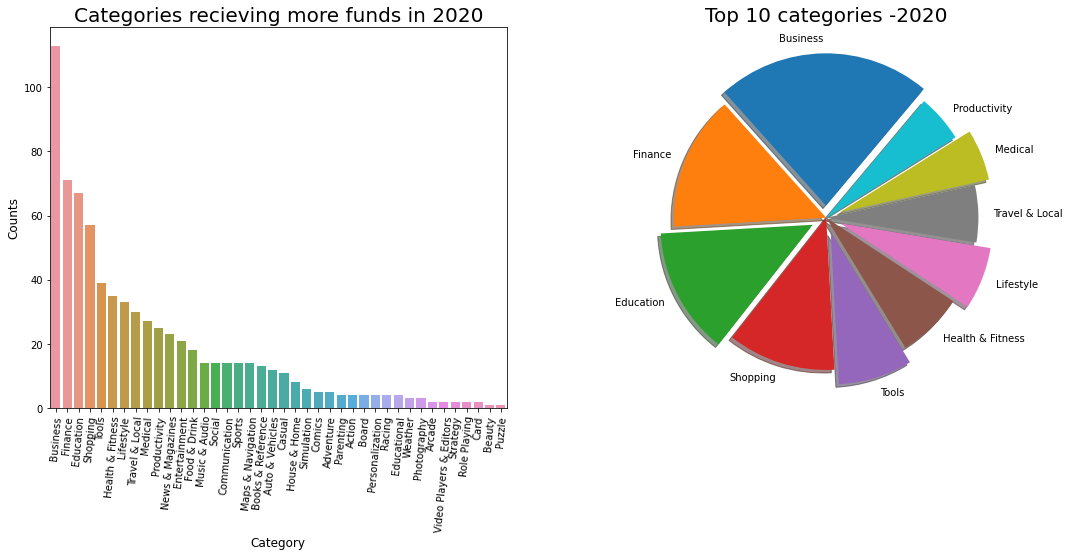

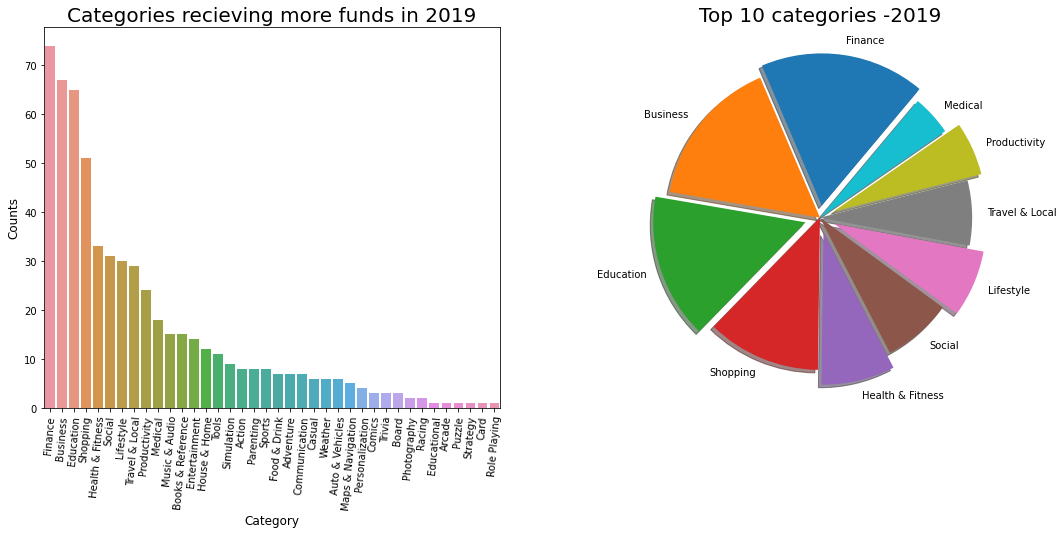

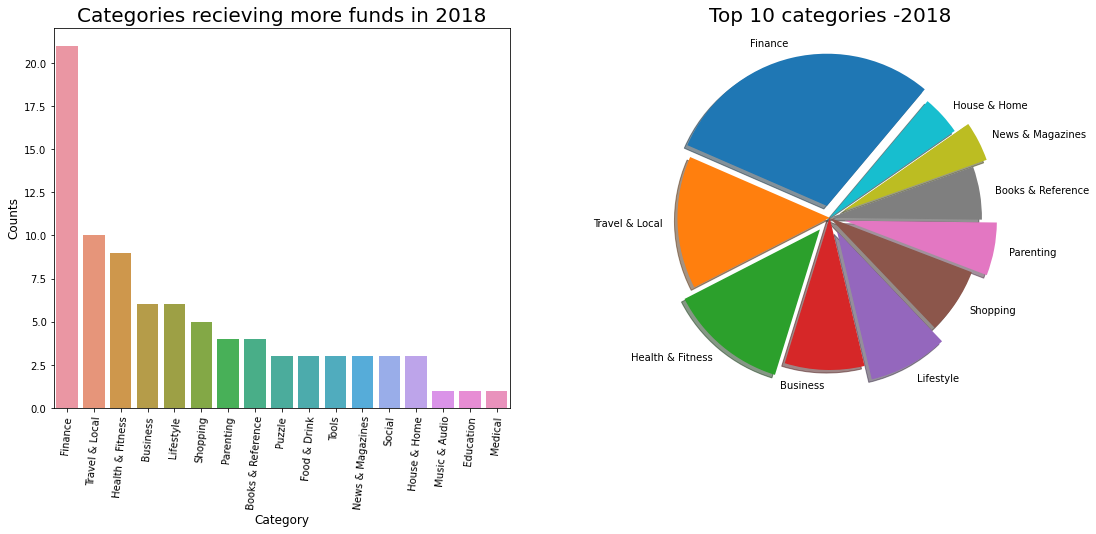

In [ ]:
# Trend of recieving funds over years for each category
years = Funded_df['Year'].value_counts().index.to_list()

plt.rcParams['figure.figsize'] = (18, 7)
for i in years:
  plt.figure()
  temp = Funded_df[Funded_df['Year']==i]
  a = pd.DataFrame(temp['Application Category'].value_counts())
  ax1 = plt.subplot(121)
  sns.barplot(x=a.index, y= a['Application Category'] )
  plt.xlabel('Category', fontsize = 12)
  plt.xticks(rotation=85)
  plt.ylabel('Counts', fontsize = 12)
  ax1.set_title('Categories recieving more funds in '+str(i), fontsize = 20)

  ax2 = plt.subplot(122)
  explode =(0.08,0,0.1,0, 0.1,0,0.1,0, 0.1, 0)
  plt.pie(a.sort_values(['Application Category'], ascending=False).head(10), labels=a.sort_values(['Application Category'], ascending=False).head(10).index, startangle=50, shadow = True, explode = explode)
  ax2.set_title('Top 10 categories -'+str(i), fontsize = 20) 

In [ ]:
# Numerical variables
numerical = ['Avg_Session_Time', 'Open_Rate', 'Reach', 'Total_Session_Time']

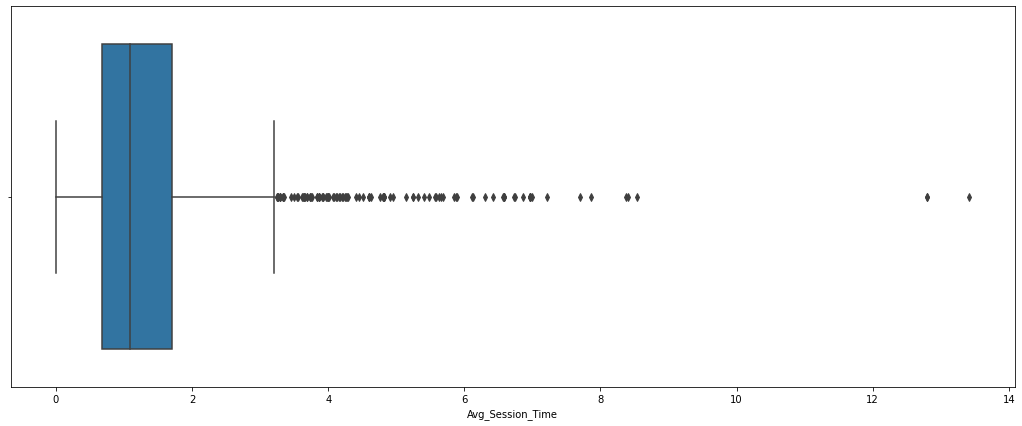

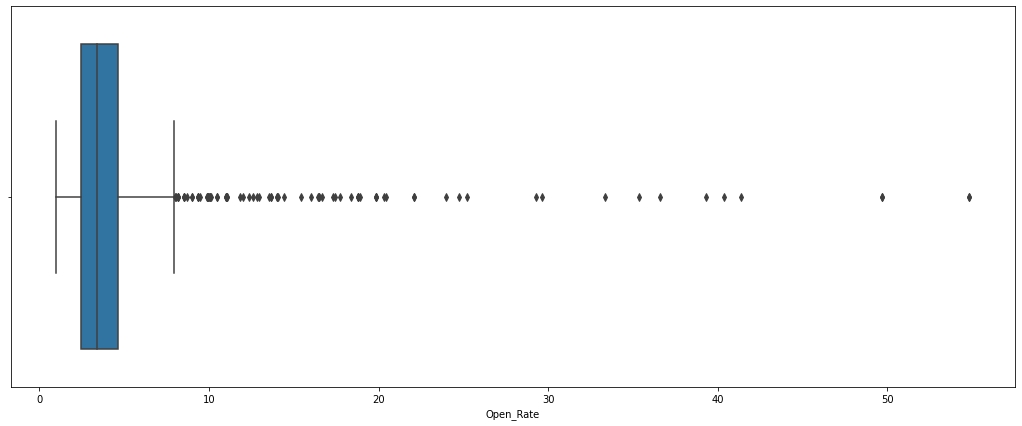

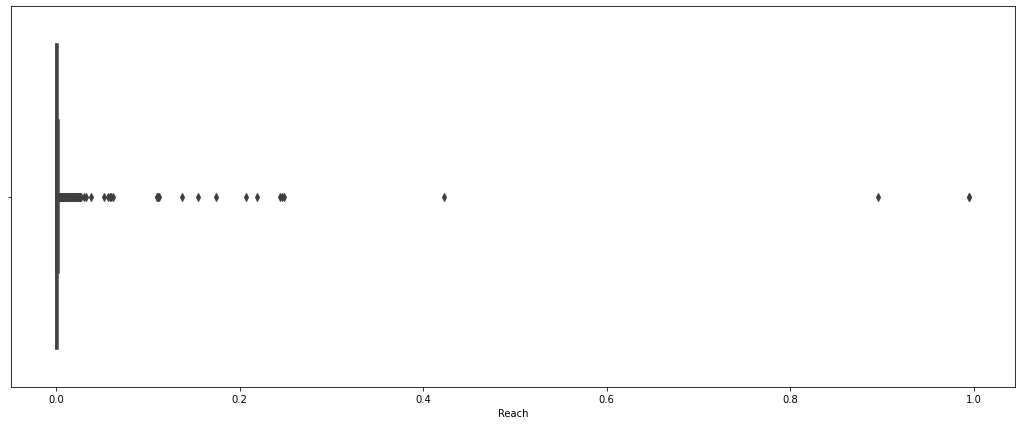

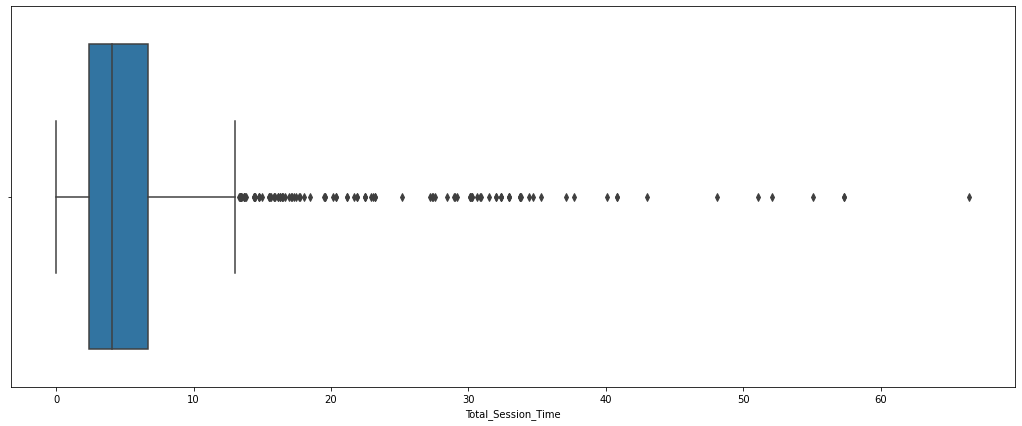

In [ ]:
for i in numerical:
  plt.figure()
  sns.boxplot(Funded_df[i])

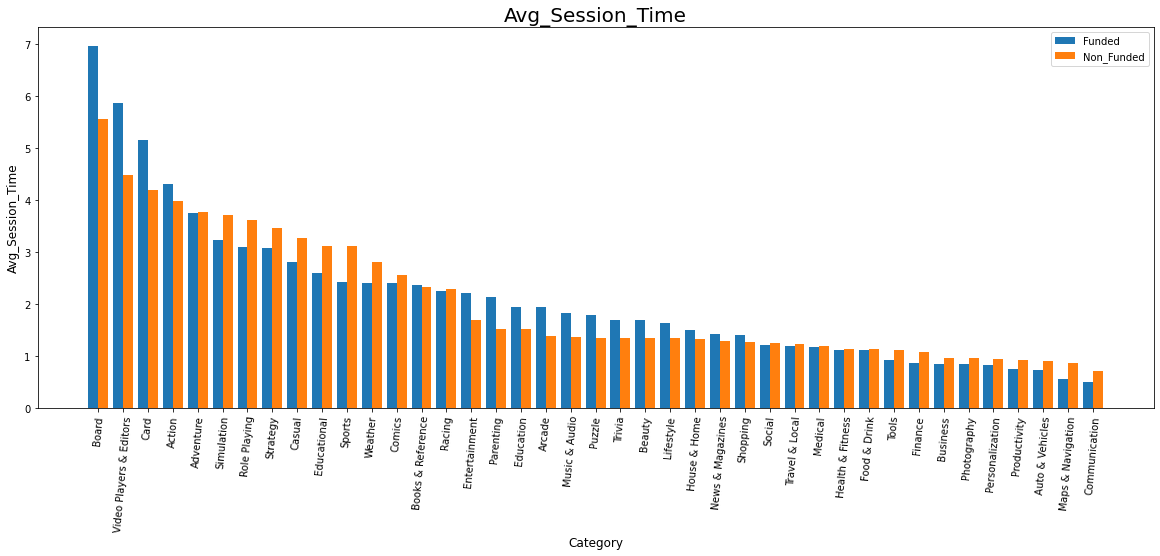

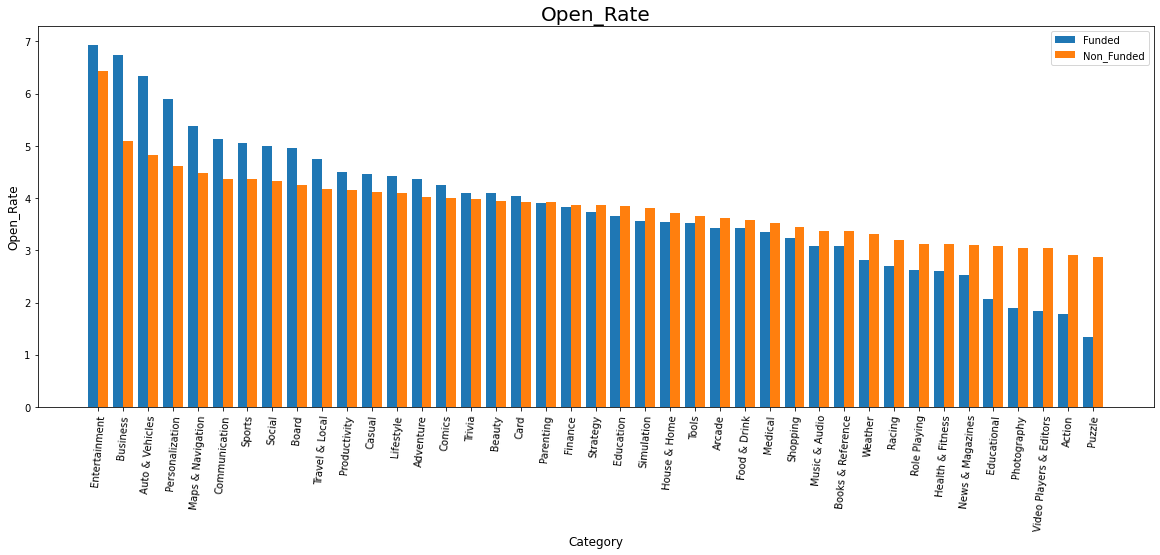

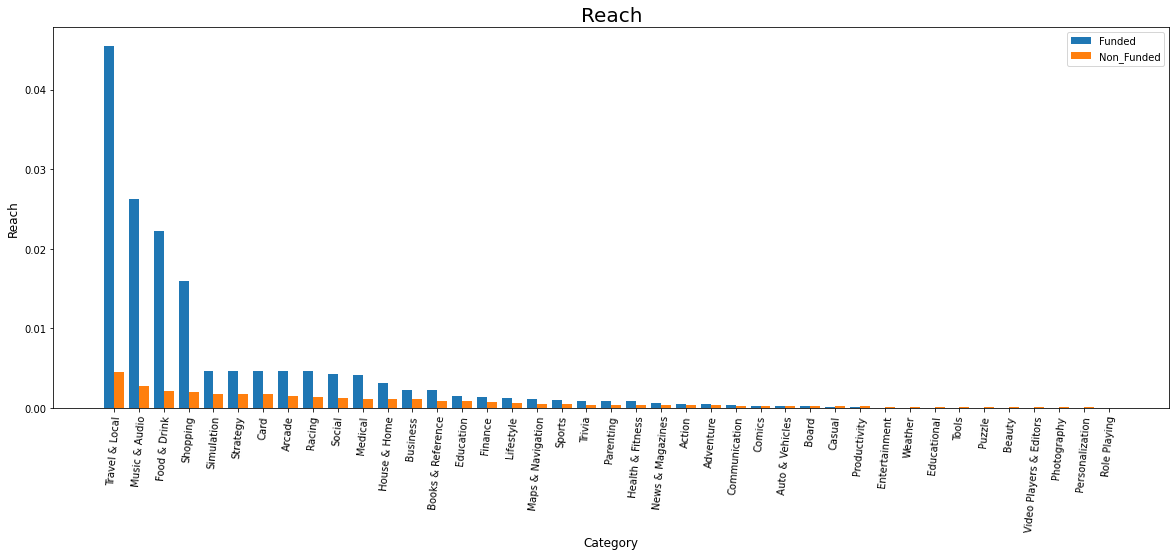

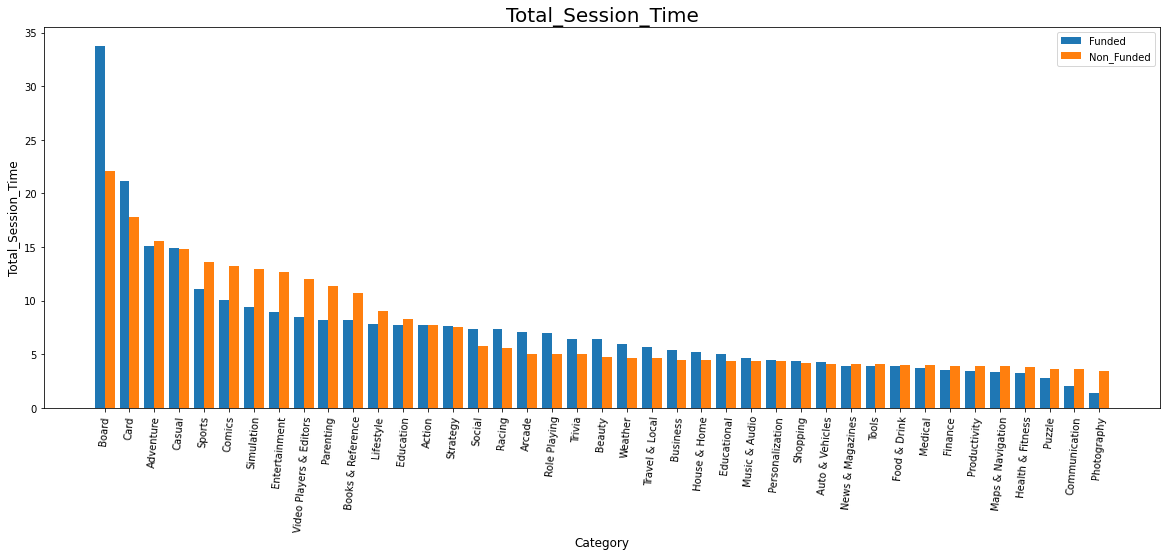

In [ ]:
plt.rcParams['figure.figsize'] = (20, 7)
for i in numerical:
  w=0.4
  temp = pd.DataFrame(Funded_df.groupby(['Application Category'])[i].mean())
  temp = temp.sort_values([i], ascending=False)
  temp2 = pd.DataFrame(Non_funded_df.groupby(['Application Category'])[i].mean())
  temp2 = temp2.sort_values([i], ascending=False)
  for j in never_funded:
    temp2.drop(j, inplace = True)

  bar1 = np.arange(len(temp.index))
  bar2 = [i+w for i in bar1]

  plt.bar(bar1, temp[i], w, label = 'Funded' )
  plt.bar(bar2, temp2[i], w, label = 'Non_Funded' )

  plt.xlabel('Category', fontsize = 12)
  plt.xticks(bar1+w/2, temp.index, rotation=85)
  plt.ylabel(i, fontsize = 12)
  plt.title(i, fontsize = 20)
  plt.legend()
  plt.show()

Not Funded in 2020 - ['Trivia', 'Art & Design', 'Music', 'Word', 'Events', 'Dating', 'Casino', 'Libraries & Demo']


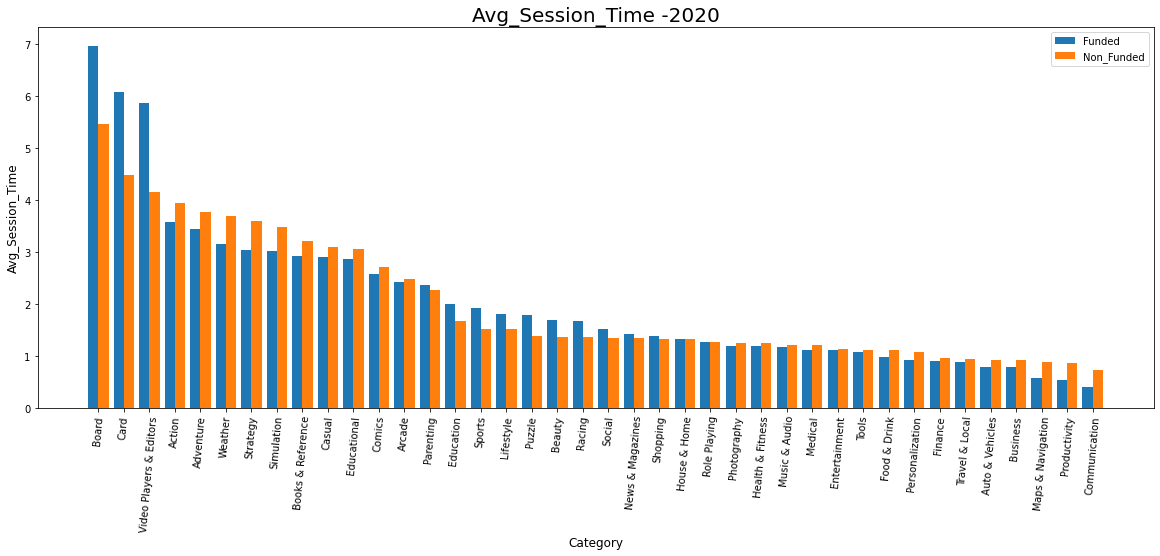

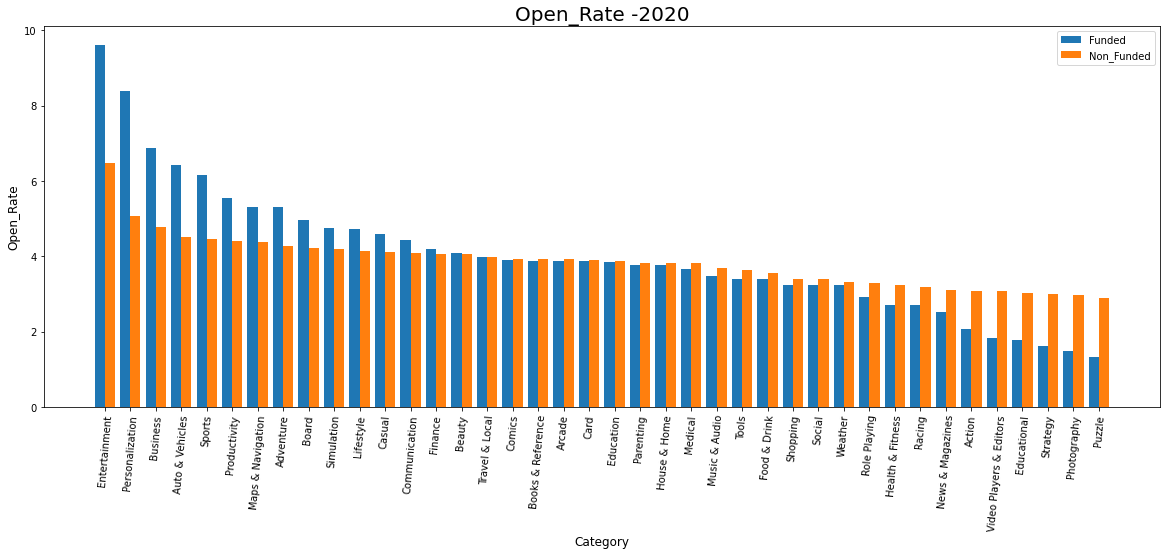

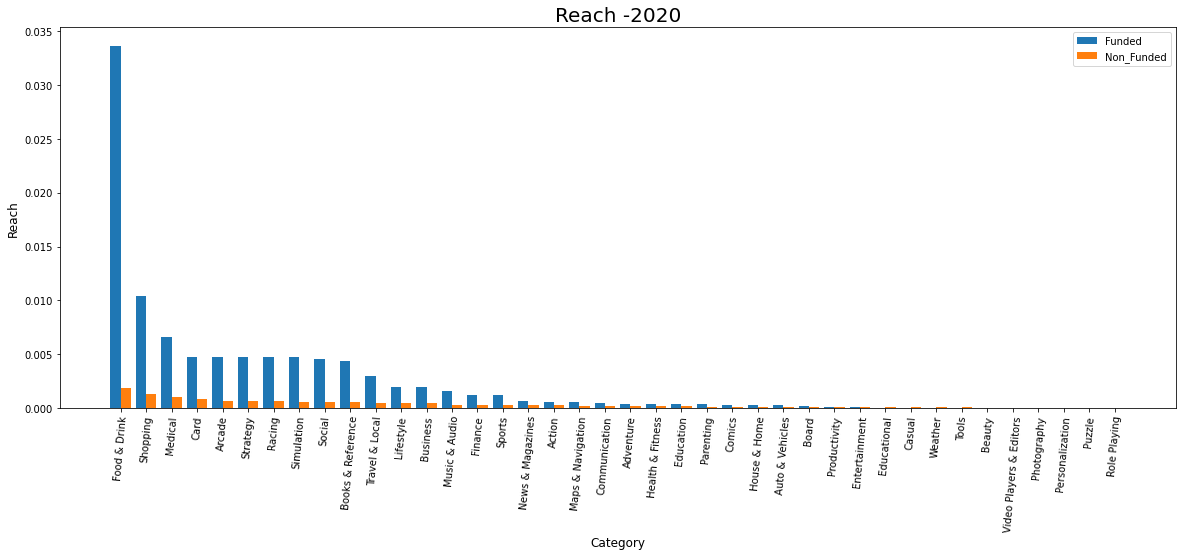

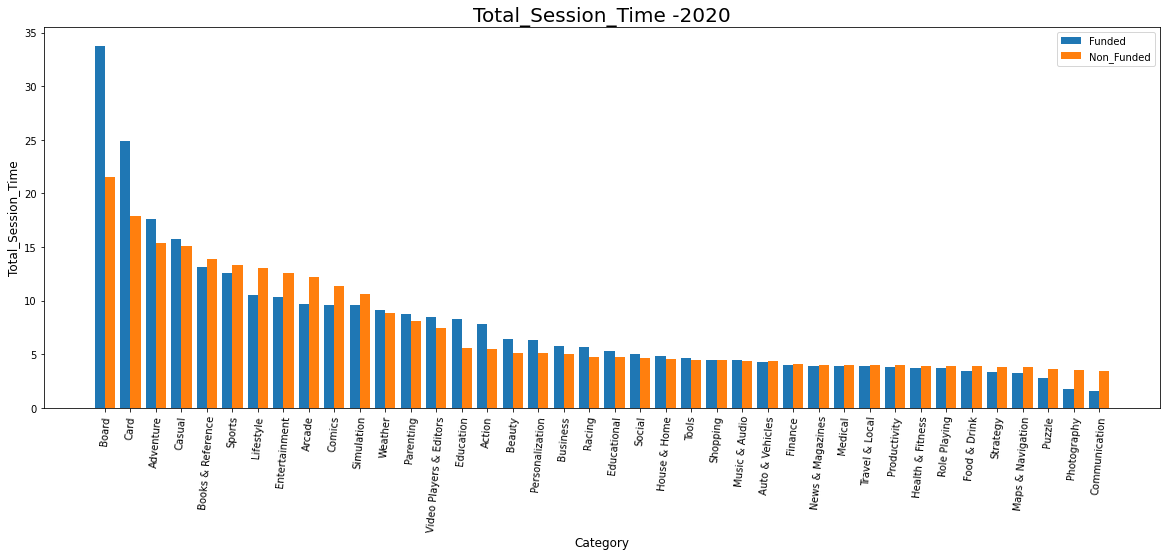

Not Funded in 2019 - ['Art & Design', 'Music', 'Word', 'Beauty', 'Events', 'News & Magazines', 'Video Players & Editors', 'Dating', 'Casino', 'Libraries & Demo']


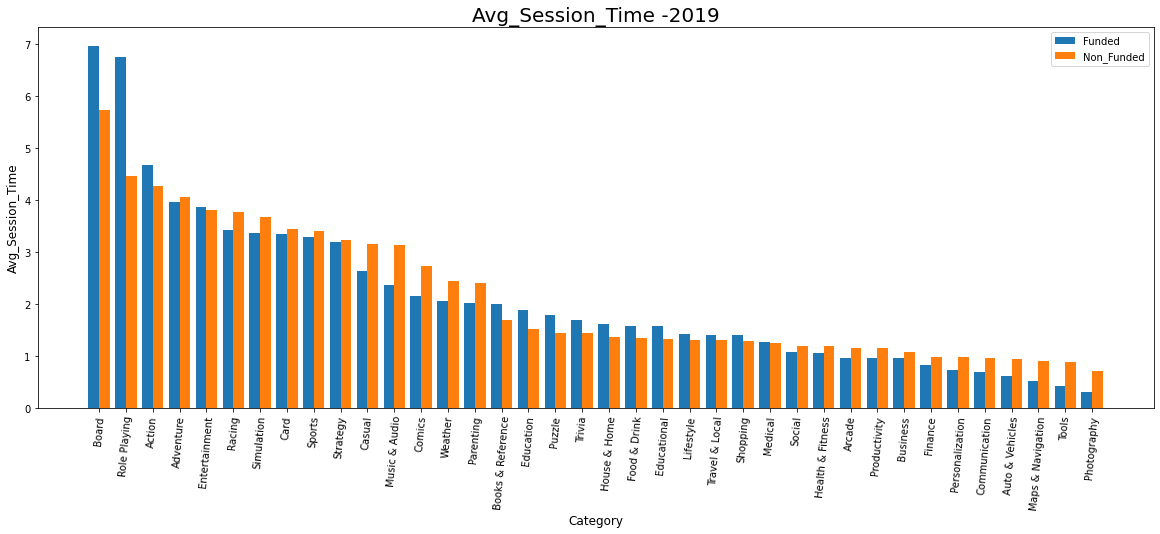

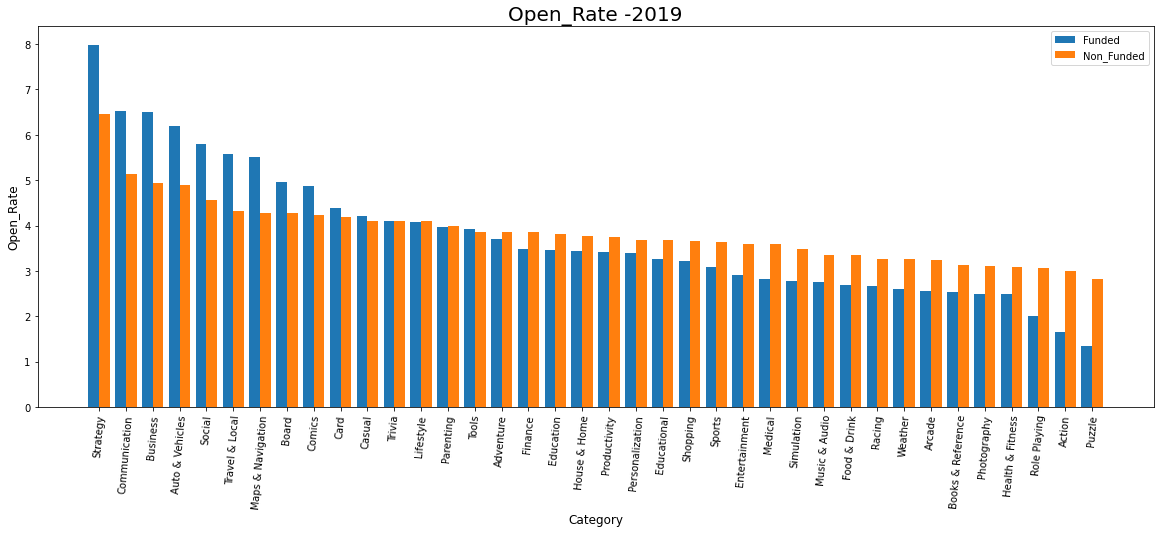

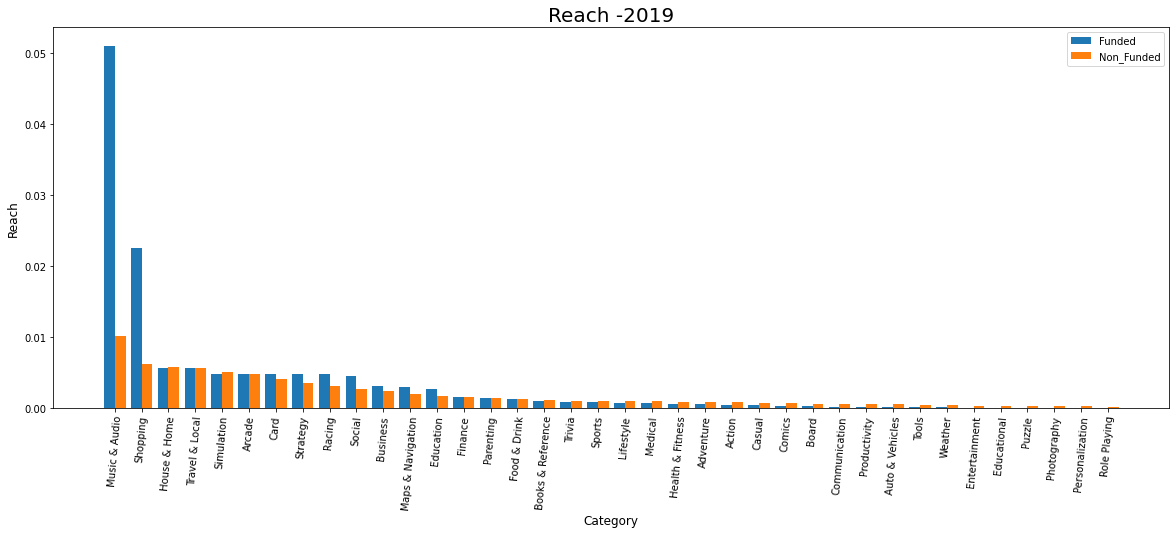

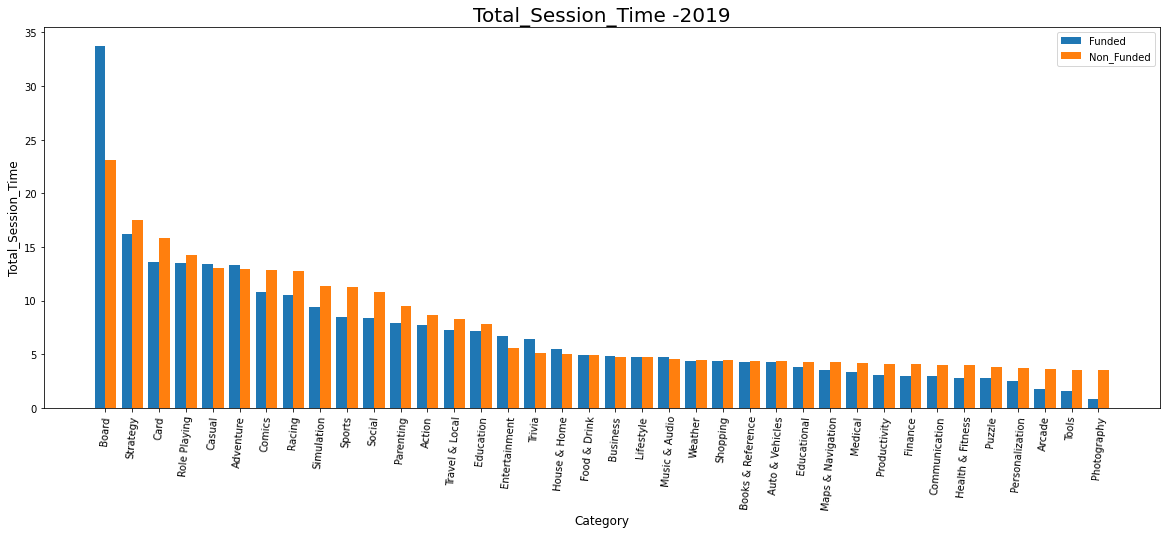

Not Funded in 2018 - ['Music', 'Sports', 'Communication', 'Strategy', 'Casino', 'Arcade', 'Productivity', 'Casual', 'Card', 'Word', 'Racing', 'Role Playing', 'Video Players & Editors', 'Entertainment', 'Simulation', 'Maps & Navigation', 'Personalization', 'Action', 'Trivia', 'Comics', 'Photography', 'Educational', 'Beauty', 'Auto & Vehicles', 'Art & Design', 'Board', 'Adventure', 'Events', 'Dating', 'Weather', 'Libraries & Demo']


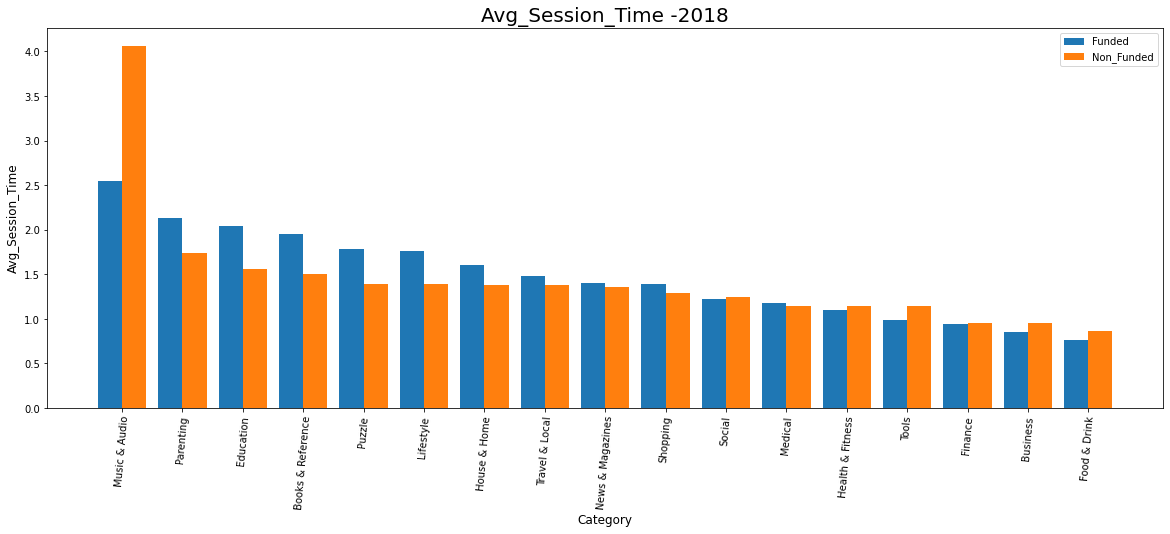

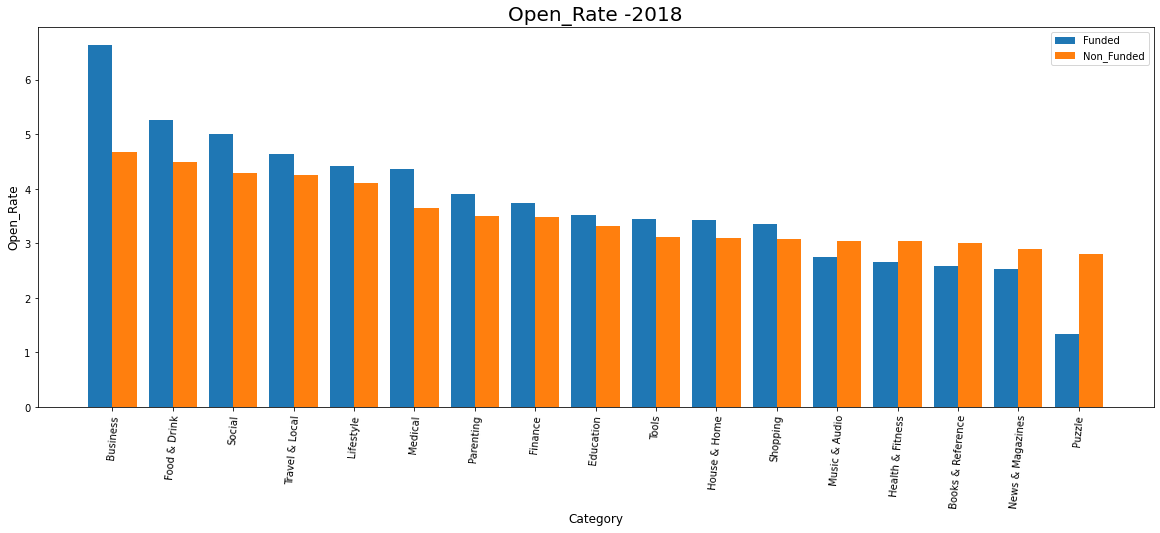

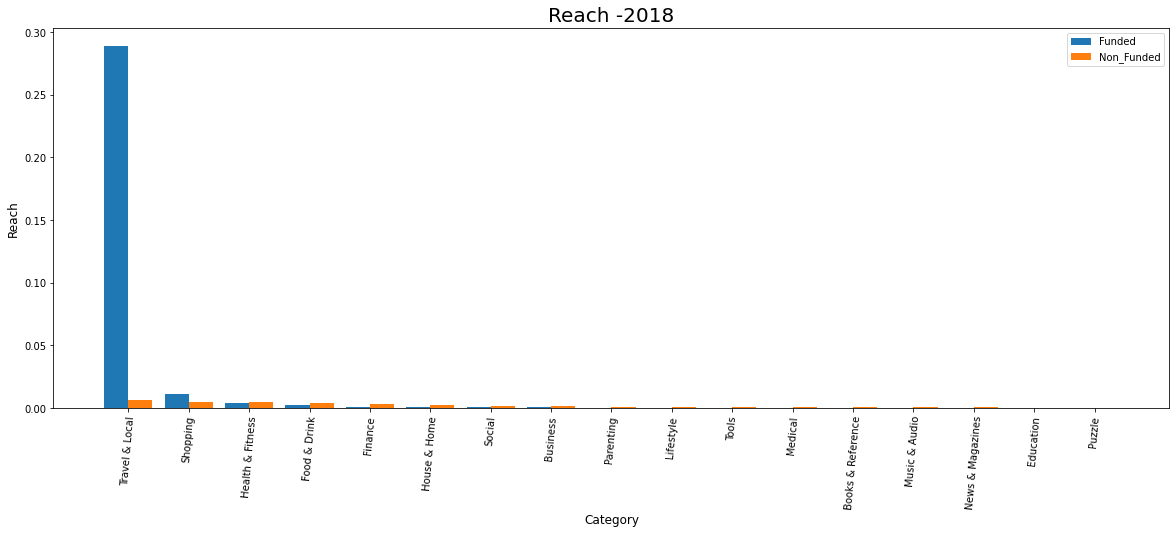

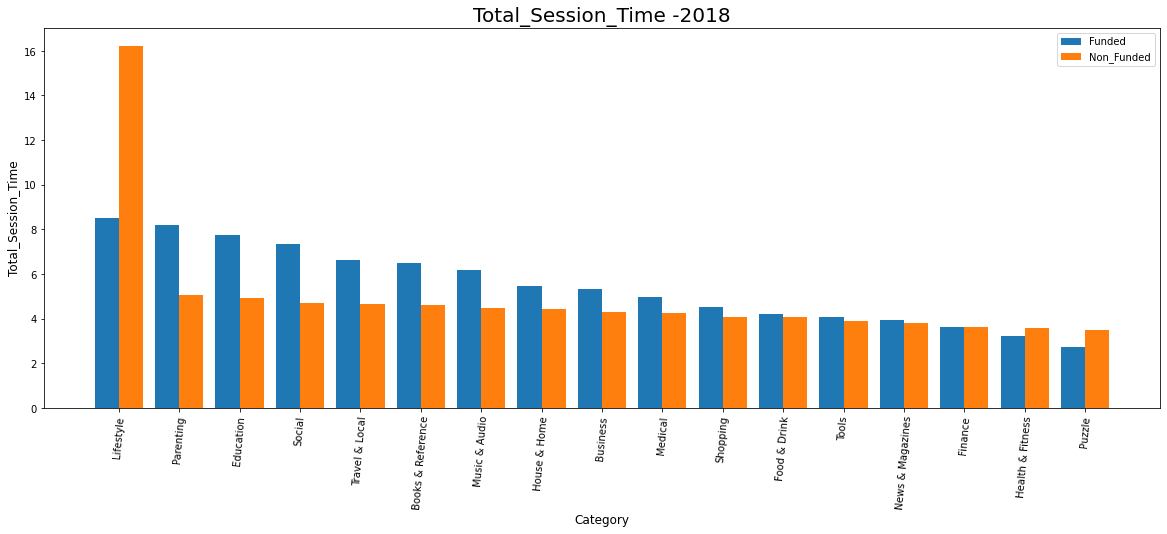

In [ ]:
# Trend for each category year wise
plt.rcParams['figure.figsize'] = (20, 7)

years = Funded_df['Year'].value_counts().index.to_list()
for j in years:
  a1 = Funded_df[Funded_df['Year']==j]
  a2 = Non_funded_df[Non_funded_df['Year']==j]
  not_funded = list(set(a2['Application Category'].value_counts().index.to_list()) - set(a1['Application Category'].value_counts().index.to_list()))
  print('Not Funded in '+str(j)+' -',not_funded)
  for i in numerical:
    w=0.4
    temp = pd.DataFrame(a1.groupby(['Application Category'])[i].mean())
    temp = temp.sort_values([i], ascending=False)
    temp2 = pd.DataFrame(a2.groupby(['Application Category'])[i].mean())
    temp2 = temp2.sort_values([i], ascending=False)
    for k in not_funded:
      temp2.drop(k, inplace = True)

    bar1 = np.arange(len(temp.index))
    bar2 = [i+w for i in bar1]

    plt.bar(bar1, temp[i], w, label = 'Funded' )
    plt.bar(bar2, temp2[i], w, label = 'Non_Funded' )

    plt.xlabel('Category', fontsize = 12)
    plt.xticks(bar1+w/2, temp.index, rotation=85)
    plt.ylabel(i, fontsize = 12)
    plt.title(i +' -'+ str(j), fontsize = 20)
    plt.legend()
    plt.show() 

In [ ]:
# Some UUID have multiple observations for same month, so will be taking mean of that in final dataset.
Funded_df[Funded_df['UUID']=='fd531f493d841c40301e4e0b234ebd2601b7c29d']

,UUID,month,Application Category,Avg_Session_Time,Open_Rate,Reach,Total_Session_Time,funding_ind,Year,Month
2235,fd531f493d841c40301e4e0b234ebd2601b7c29d,20200601,Educational,3.737922,1.545455,0.000049,5.595592,1,2020,6
2239,fd531f493d841c40301e4e0b234ebd2601b7c29d,20200501,Educational,2.651596,1.600000,0.000072,2.765850,1,2020,5
2242,fd531f493d841c40301e4e0b234ebd2601b7c29d,20200401,Educational,3.686611,2.250000,0.000043,10.818879,1,2020,4


In [ ]:
# Dropping about 30,000 observations of Category that were never funded.
for i in never_funded:
  Final_df.drop(Final_df[Final_df['Application Category']==i].index, inplace =True)

In [ ]:
Final_df.shape

(924071, 10)

In [ ]:
# Taking only 1 category that has been funded most
a = pd.DataFrame(Funded_df['Application Category'].value_counts())
a = a.sort_values(['Application Category'], ascending=False).head(1)
cat_1 = a.index.to_list()

In [ ]:
cat_1_df = pd.DataFrame(columns = Final_df.columns)
for i in cat_1:
  temp = Final_df[Final_df['Application Category']==i]
  cat_1_df = pd.concat([cat_1_df, temp])

In [ ]:
cat_1_df.shape

(65051, 10)

In [ ]:
# Startups within last 3 months
a = pd.DataFrame(cat_1_df['UUID'].value_counts())
recent_startups = a[a['UUID']<4].index.to_list()
len(recent_startups)

9423

In [ ]:
# Dropping recent startups
for i in recent_startups:
  cat_1_df.drop(cat_1_df[cat_1_df['UUID']==i].index, inplace =True)

In [ ]:
cat_1_df.shape

(47799, 10)

In [ ]:
cat_1_df.to_csv(folder + 'category.csv', index= False)

In [ ]:
def Previous_Data(column, dataframe):
  new_data = pd.DataFrame(columns = dataframe.columns)
  Unique_id = dataframe['UUID'].value_counts().index.to_list()

  for i in Unique_id:
    #print(i)
    temp1 = dataframe[dataframe['UUID']==i]
    temp2 = dataframe[dataframe['UUID']==i][['UUID', 'month', column]]
    temp2 = temp2.sort_values(by=['month'])
    temp2.set_index(['UUID', 'month'], inplace = True)
    temp2 = pd.DataFrame(temp2[column].shift(+1))
    temp2.fillna(temp2.mean(), inplace = True)
    temp2.rename(columns={column:column+'_Prev1'}, inplace=True)
    temp2.reset_index(inplace=True)
    temp2.drop(['UUID'], axis = 1, inplace=True)
    new_df = pd.merge(temp1, temp2, on = 'month', how='left')
    new_data = pd.concat([new_data, new_df])
  return new_data

In [ ]:
for i in numerical:
  print(i)
  cat_1_df = Previous_Data(i, cat_1_df)

Avg_Session_Time
Open_Rate
Reach
Total_Session_Time


In [ ]:
cat_1_df.shape

(47799, 14)

In [ ]:
cat_1_df.to_csv(folder + 'category_prev1.csv', index= False)

In [ ]:
numerical = ['Avg_Session_Time_Prev1', 'Open_Rate_Prev1', 'Reach_Prev1', 'Total_Session_Time_Prev1']

In [ ]:
for i in numerical:
  print(i)
  cat_1_df = Previous_Data(i, cat_1_df)

Avg_Session_Time_Prev1
Open_Rate_Prev1
Reach_Prev1
Total_Session_Time_Prev1


In [ ]:
cat_1_df.shape

(47799, 18)

In [ ]:
cat_1_df.columns

Index(['UUID', 'month', 'Application Category', 'Avg_Session_Time',
       'Open_Rate', 'Reach', 'Total_Session_Time', 'funding_ind', 'Year',
       'Month', 'Avg_Session_Time_Prev1', 'Open_Rate_Prev1', 'Reach_Prev1',
       'Total_Session_Time_Prev1', 'Avg_Session_Time_Prev1_Prev1',
       'Open_Rate_Prev1_Prev1', 'Reach_Prev1_Prev1',
       'Total_Session_Time_Prev1_Prev1'],
      dtype='object')

In [ ]:
cat_1_df.rename(columns={'Avg_Session_Time_Prev1_Prev1':'Avg_Session_Time_Prev2', 'Open_Rate_Prev1_Prev1':'Open_Rate_Prev2', 'Reach_Prev1_Prev1':'Reach_Prev2', 'Total_Session_Time_Prev1_Prev1':'Total_Session_Time_Prev2'}, inplace=True)

In [ ]:
cat_1_df.head(3)

,UUID,month,Application Category,Avg_Session_Time,Open_Rate,Reach,Total_Session_Time,funding_ind,Year,Month,Avg_Session_Time_Prev1,Open_Rate_Prev1,Reach_Prev1,Total_Session_Time_Prev1,Avg_Session_Time_Prev2,Open_Rate_Prev2,Reach_Prev2,Total_Session_Time_Prev2
0,acd3c9e30fb6247efdd9abf9dbd082cd7b94e263,20200301,Business,0.802322,6.548351,0.000412,5.356530,0,2020,3,0.637998,8.881053,0.000449,5.531515,0.698461,8.988514,0.000391,6.222412
1,acd3c9e30fb6247efdd9abf9dbd082cd7b94e263,20200201,Business,0.637998,8.881053,0.000449,5.531515,0,2020,2,0.698461,8.988514,0.000391,6.222412,0.712017,5.941688,0.000385,4.054241
2,acd3c9e30fb6247efdd9abf9dbd082cd7b94e263,20200601,Business,0.763235,8.301939,0.000328,6.284474,0,2020,6,0.780437,8.184211,0.000398,5.865179,0.774300,3.148571,0.000245,2.594880


In [ ]:
cat_1_df.to_csv(folder + 'category_prev2.csv', index= False)

In [ ]:
cat_1_df.columns

Index(['UUID', 'month', 'Application Category', 'Avg_Session_Time',
       'Open_Rate', 'Reach', 'Total_Session_Time', 'funding_ind', 'Year',
       'Month', 'Avg_Session_Time_Prev1', 'Open_Rate_Prev1', 'Reach_Prev1',
       'Total_Session_Time_Prev1', 'Avg_Session_Time_Prev2', 'Open_Rate_Prev2',
       'Reach_Prev2', 'Total_Session_Time_Prev2'],
      dtype='object')

In [ ]:
numerical = ['Avg_Session_Time_Prev2', 'Open_Rate_Prev2', 'Reach_Prev2', 'Total_Session_Time_Prev2']

In [ ]:
# Previos 3rd month data
for i in numerical:
  print(i)
  cat_1_df = Previous_Data(i, cat_1_df)

Avg_Session_Time_Prev2
Open_Rate_Prev2
Reach_Prev2
Total_Session_Time_Prev2


In [ ]:
cat_1_df.shape

(47799, 22)

In [ ]:
cat_1_df.columns

Index(['UUID', 'month', 'Application Category', 'Avg_Session_Time',
       'Open_Rate', 'Reach', 'Total_Session_Time', 'funding_ind', 'Year',
       'Month', 'Avg_Session_Time_Prev1', 'Open_Rate_Prev1', 'Reach_Prev1',
       'Total_Session_Time_Prev1', 'Avg_Session_Time_Prev2', 'Open_Rate_Prev2',
       'Reach_Prev2', 'Total_Session_Time_Prev2',
       'Avg_Session_Time_Prev2_Prev1', 'Open_Rate_Prev2_Prev1',
       'Reach_Prev2_Prev1', 'Total_Session_Time_Prev2_Prev1'],
      dtype='object')

In [ ]:
cat_1_df.rename(columns={'Avg_Session_Time_Prev2_Prev1':'Avg_Session_Time_Prev3', 'Open_Rate_Prev2_Prev1':'Open_Rate_Prev3', 'Reach_Prev2_Prev1':'Reach_Prev3', 'Total_Session_Time_Prev2_Prev1':'Total_Session_Time_Prev3'}, inplace=True)

In [ ]:
cat_1_df.columns

Index(['UUID', 'month', 'Application Category', 'Avg_Session_Time',
       'Open_Rate', 'Reach', 'Total_Session_Time', 'funding_ind', 'Year',
       'Month', 'Avg_Session_Time_Prev1', 'Open_Rate_Prev1', 'Reach_Prev1',
       'Total_Session_Time_Prev1', 'Avg_Session_Time_Prev2', 'Open_Rate_Prev2',
       'Reach_Prev2', 'Total_Session_Time_Prev2', 'Avg_Session_Time_Prev3',
       'Open_Rate_Prev3', 'Reach_Prev3', 'Total_Session_Time_Prev3'],
      dtype='object')

In [ ]:
cat_1_df.to_csv(folder + 'category_prev3.csv', index= False)

In [ ]:
cat_1_df['month'].max()

20200601

In [ ]:
temp = cat_1_df[['UUID', 'month', 'funding_ind']]
temp.set_index('month', inplace =True)
temp = temp.loc[[20200601, 20200501, 20200401]]
temp.reset_index(inplace= True)
unique_id = temp['UUID'].value_counts().index.to_list()
new = pd.DataFrame(columns=temp.columns)
for i in unique_id:
  temp2 = temp[temp['UUID']==i]
  temp2['Funded'] = np.sum(temp2['funding_ind'])
  new = pd.concat([new, temp2])
new_df = pd.merge(cat_1_df, new, on = ['UUID','month'], how='left')

In [ ]:
new_df.shape

(47799, 24)

In [ ]:
new_df['Funded'].value_counts()

0.0    16026
1.0       51
2.0       44
3.0        6
Name: Funded, dtype: int64

In [ ]:
new_df.fillna(0, inplace =True)

In [ ]:
def dependent(float):
  if float==0:
    return int(0)
  else:
    return int(1)

In [ ]:
new_df['Funded'] = new_df['Funded'].apply(dependent)

In [ ]:
new_df['Funded'].value_counts()

0    47698
1      101
Name: Funded, dtype: int64

In [ ]:
new_df.isna().sum()

UUID                        0
month                       0
Application Category        0
Avg_Session_Time            0
Open_Rate                   0
Reach                       0
Total_Session_Time          0
funding_ind_x               0
Year                        0
Month                       0
Avg_Session_Time_Prev1      0
Open_Rate_Prev1             0
Reach_Prev1                 0
Total_Session_Time_Prev1    0
Avg_Session_Time_Prev2      0
Open_Rate_Prev2             0
Reach_Prev2                 0
Total_Session_Time_Prev2    0
Avg_Session_Time_Prev3      0
Open_Rate_Prev3             0
Reach_Prev3                 0
Total_Session_Time_Prev3    0
funding_ind_y               0
Funded                      0
dtype: int64

In [ ]:
Prepared_data = new_df.copy()

In [ ]:
Prepared_data.head(3)

,Year,Month,Avg_Session_Time_Prev3,Open_Rate_Prev3,Reach_Prev3,Total_Session_Time_Prev3,Funded
0,2020,3,0.054062,1.297619,0.000297,0.102915,0
1,2020,2,0.251853,1.038462,0.000326,0.369331,0
2,2020,6,0.123502,1.142857,0.000057,0.155060,0


In [ ]:
new_df.to_csv(folder + 'Prepared1.csv', index= False)

In [ ]:
Prepared_data = pd.read_csv(folder + 'Prepared1.csv')

In [ ]:
Prepared_data.columns

Index(['UUID', 'month', 'Application Category', 'Avg_Session_Time',
       'Open_Rate', 'Reach', 'Total_Session_Time', 'funding_ind_x', 'Year',
       'Month', 'Avg_Session_Time_Prev1', 'Open_Rate_Prev1', 'Reach_Prev1',
       'Total_Session_Time_Prev1', 'Avg_Session_Time_Prev2', 'Open_Rate_Prev2',
       'Reach_Prev2', 'Total_Session_Time_Prev2', 'Avg_Session_Time_Prev3',
       'Open_Rate_Prev3', 'Reach_Prev3', 'Total_Session_Time_Prev3',
       'funding_ind_y', 'Funded'],
      dtype='object')

In [ ]:
Prepared_data.head(3)

,UUID,month,Application Category,Avg_Session_Time,Open_Rate,Reach,Total_Session_Time,funding_ind_x,Year,Month,Avg_Session_Time_Prev1,Open_Rate_Prev1,Reach_Prev1,Total_Session_Time_Prev1,Avg_Session_Time_Prev2,Open_Rate_Prev2,Reach_Prev2,Total_Session_Time_Prev2,Avg_Session_Time_Prev3,Open_Rate_Prev3,Reach_Prev3,Total_Session_Time_Prev3,funding_ind_y,Funded
0,ae486abe73ea6e27ad5f3f8a209957d0b0efeb2f,20200301,Business,0.123502,1.142857,0.000057,0.155060,0,2020,3,0.191377,1.047619,0.000274,0.196478,0.171075,1.299213,0.000290,0.248387,0.054062,1.297619,0.000297,0.102915,0,0
1,ae486abe73ea6e27ad5f3f8a209957d0b0efeb2f,20200201,Business,0.191377,1.047619,0.000274,0.196478,0,2020,2,0.171075,1.299213,0.000290,0.248387,0.054062,1.297619,0.000297,0.102915,0.251853,1.038462,0.000326,0.369331,0,0
2,ae486abe73ea6e27ad5f3f8a209957d0b0efeb2f,20200601,Business,0.331770,1.090909,0.000044,0.396892,0,2020,6,0.073976,1.166667,0.000072,0.125700,0.066093,1.100000,0.000033,0.068542,0.123502,1.142857,0.000057,0.155060,0,0


In [ ]:
Prepared_data['Avg_Session_Time_change_3'] = Prepared_data['Avg_Session_Time_Prev3'] - Prepared_data['Avg_Session_Time']
Prepared_data['Avg_Session_Time_change_2'] = Prepared_data['Avg_Session_Time_Prev2'] - Prepared_data['Avg_Session_Time']
Prepared_data['Avg_Session_Time_change_1'] = Prepared_data['Avg_Session_Time_Prev1'] - Prepared_data['Avg_Session_Time']

Prepared_data['Open_Rate_change_3'] = Prepared_data['Open_Rate_Prev3'] - Prepared_data['Open_Rate']
Prepared_data['Open_Rate_change_2'] = Prepared_data['Open_Rate_Prev2'] - Prepared_data['Open_Rate']
Prepared_data['Open_Rate_change_1'] = Prepared_data['Open_Rate_Prev1'] - Prepared_data['Open_Rate']

Prepared_data['Reach_change_3'] = Prepared_data['Reach_Prev3'] - Prepared_data['Reach']
Prepared_data['Reach_change_2'] = Prepared_data['Reach_Prev2'] - Prepared_data['Reach']
Prepared_data['Reach_change_1'] = Prepared_data['Reach_Prev1'] - Prepared_data['Reach']

Prepared_data['Total_Session_Time_change_3'] = Prepared_data['Total_Session_Time_Prev3'] - Prepared_data['Total_Session_Time']
Prepared_data['Total_Session_Time_change_2'] = Prepared_data['Total_Session_Time_Prev2'] - Prepared_data['Total_Session_Time']
Prepared_data['Total_Session_Time_change_1'] = Prepared_data['Total_Session_Time_Prev1'] - Prepared_data['Total_Session_Time']

In [ ]:
Prepared_data.shape

(47799, 36)

In [ ]:
Prepared_data.to_csv(folder + 'Final_prepared_featured.csv', index=False)

In [ ]:
year_list = list(set(Prepared_data['month'].value_counts().index.to_list()) - set([20200601, 20200501, 20200401]))

In [ ]:
Prepared_data.head()

,UUID,month,Application Category,Avg_Session_Time,Open_Rate,Reach,Total_Session_Time,funding_ind_x,Year,Month,Avg_Session_Time_Prev1,Open_Rate_Prev1,Reach_Prev1,Total_Session_Time_Prev1,Avg_Session_Time_Prev2,Open_Rate_Prev2,Reach_Prev2,Total_Session_Time_Prev2,Avg_Session_Time_Prev3,Open_Rate_Prev3,Reach_Prev3,Total_Session_Time_Prev3,funding_ind_y,Funded,Avg_Session_Time_change_3,Avg_Session_Time_change_2,Avg_Session_Time_change_1,Open_Rate_change_3,Open_Rate_change_2,Open_Rate_change_1,Reach_change_3,Reach_change_2,Reach_change_1,Total_Session_Time_change_3,Total_Session_Time_change_2,Total_Session_Time_change_1
0,ae486abe73ea6e27ad5f3f8a209957d0b0efeb2f,20200301,Business,0.123502,1.142857,0.000057,0.155060,0,2020,3,0.191377,1.047619,0.000274,0.196478,0.171075,1.299213,0.000290,0.248387,0.054062,1.297619,0.000297,0.102915,0,0,-0.069440,0.047573,0.067875,0.154762,0.156355,-0.095238,0.000240,0.000234,0.000217,-0.052145,0.093327,0.041418
1,ae486abe73ea6e27ad5f3f8a209957d0b0efeb2f,20200201,Business,0.191377,1.047619,0.000274,0.196478,0,2020,2,0.171075,1.299213,0.000290,0.248387,0.054062,1.297619,0.000297,0.102915,0.251853,1.038462,0.000326,0.369331,0,0,0.060476,-0.137315,-0.020302,-0.009158,0.250000,0.251594,0.000052,0.000024,0.000017,0.172853,-0.093563,0.051909
2,ae486abe73ea6e27ad5f3f8a209957d0b0efeb2f,20200601,Business,0.331770,1.090909,0.000044,0.396892,0,2020,6,0.073976,1.166667,0.000072,0.125700,0.066093,1.100000,0.000033,0.068542,0.123502,1.142857,0.000057,0.155060,0,0,-0.208268,-0.265676,-0.257794,0.051948,0.009091,0.075758,0.000013,-0.000011,0.000027,-0.241832,-0.328351,-0.271192
3,ae486abe73ea6e27ad5f3f8a209957d0b0efeb2f,20200101,Business,0.171075,1.299213,0.000290,0.248387,0,2020,1,0.054062,1.297619,0.000297,0.102915,0.251853,1.038462,0.000326,0.369331,0.975511,4.991454,0.000339,4.925617,0,0,0.804436,0.080778,-0.117012,3.692241,-0.260751,-0.001594,0.000048,0.000035,0.000007,4.677230,0.120944,-0.145473
4,ae486abe73ea6e27ad5f3f8a209957d0b0efeb2f,20200501,Business,0.073976,1.166667,0.000072,0.125700,0,2020,5,0.066093,1.100000,0.000033,0.068542,0.123502,1.142857,0.000057,0.155060,0.191377,1.047619,0.000274,0.196478,0,0,0.117401,0.049526,-0.007882,-0.119048,-0.023810,-0.066667,0.000202,-0.000015,-0.000038,0.070778,0.029360,-0.057158


In [ ]:
temp = Prepared_data[['UUID', 'month', 'funding_ind_x']]
temp.set_index('month', inplace =True)
temp = temp.loc[year_list]
temp.reset_index(inplace= True)
unique_id = temp['UUID'].value_counts().index.to_list()
new = pd.DataFrame(columns=temp.columns)
for i in unique_id:
  temp2 = temp[temp['UUID']==i]
  temp2['Times_Funded'] = np.sum(temp2['funding_ind_x'])
  new = pd.concat([new, temp2])
new_df = pd.merge(Prepared_data, new, on = ['UUID','month'], how='left')

In [ ]:
new_df.head(3)

,UUID,month,Application Category,Avg_Session_Time,Open_Rate,Reach,Total_Session_Time,funding_ind_x_x,Year,Month,Avg_Session_Time_Prev1,Open_Rate_Prev1,Reach_Prev1,Total_Session_Time_Prev1,Avg_Session_Time_Prev2,Open_Rate_Prev2,Reach_Prev2,Total_Session_Time_Prev2,Avg_Session_Time_Prev3,Open_Rate_Prev3,Reach_Prev3,Total_Session_Time_Prev3,funding_ind_y,Funded,Avg_Session_Time_change_3,Avg_Session_Time_change_2,Avg_Session_Time_change_1,Open_Rate_change_3,Open_Rate_change_2,Open_Rate_change_1,Reach_change_3,Reach_change_2,Reach_change_1,Total_Session_Time_change_3,Total_Session_Time_change_2,Total_Session_Time_change_1,funding_ind_x_y,Times_Funded
0,ae486abe73ea6e27ad5f3f8a209957d0b0efeb2f,20200301,Business,0.123502,1.142857,0.000057,0.155060,0,2020,3,0.191377,1.047619,0.000274,0.196478,0.171075,1.299213,0.000290,0.248387,0.054062,1.297619,0.000297,0.102915,0,0,-0.069440,0.047573,0.067875,0.154762,0.156355,-0.095238,0.000240,0.000234,0.000217,-0.052145,0.093327,0.041418,0,0.0
1,ae486abe73ea6e27ad5f3f8a209957d0b0efeb2f,20200201,Business,0.191377,1.047619,0.000274,0.196478,0,2020,2,0.171075,1.299213,0.000290,0.248387,0.054062,1.297619,0.000297,0.102915,0.251853,1.038462,0.000326,0.369331,0,0,0.060476,-0.137315,-0.020302,-0.009158,0.250000,0.251594,0.000052,0.000024,0.000017,0.172853,-0.093563,0.051909,0,0.0
2,ae486abe73ea6e27ad5f3f8a209957d0b0efeb2f,20200601,Business,0.331770,1.090909,0.000044,0.396892,0,2020,6,0.073976,1.166667,0.000072,0.125700,0.066093,1.100000,0.000033,0.068542,0.123502,1.142857,0.000057,0.155060,0,0,-0.208268,-0.265676,-0.257794,0.051948,0.009091,0.075758,0.000013,-0.000011,0.000027,-0.241832,-0.328351,-0.271192,NaN,NaN


In [ ]:
new_df['Times_Funded'].value_counts()

0.0    31043
3.0      481
2.0       83
1.0       65
Name: Times_Funded, dtype: int64

In [ ]:
new_df.drop(['UUID', 'month', 'Application Category', 'Avg_Session_Time', 'Open_Rate', 'Reach', 'Total_Session_Time', 'funding_ind_x_x', 'Avg_Session_Time_Prev1', 'Open_Rate_Prev1', 'Reach_Prev1','Total_Session_Time_Prev1', 'Avg_Session_Time_Prev2', 'Open_Rate_Prev2', 'Reach_Prev2', 'Total_Session_Time_Prev2', 'funding_ind_y', 'funding_ind_x_y'],axis=1, inplace=True)

In [ ]:
new_df.fillna(0, inplace =True)

In [ ]:
new_df.drop(['Year', 'Month'], axis = 1, inplace=True)

In [ ]:
new_df.to_csv(folder + 'Final_prepared_features.csv', index=False)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [ ]:
X = Prepared_data.drop('Funded', axis = 1)
y = Prepared_data['Funded']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 1)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((33459, 6), (14340, 6), (33459,), (14340,))

In [ ]:
Base_model = LogisticRegression()
Base_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_train_pred = Base_model.predict(X_train)
y_test_pred = Base_model.predict(X_test)

In [ ]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33388
           1       0.00      0.00      0.00        71

    accuracy                           1.00     33459
   macro avg       0.50      0.50      0.50     33459
weighted avg       1.00      1.00      1.00     33459



In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14310
           1       0.00      0.00      0.00        30

    accuracy                           1.00     14340
   macro avg       0.50      0.50      0.50     14340
weighted avg       1.00      1.00      1.00     14340



In [ ]:
confusion_matrix(y_train, y_train_pred)

array([[33388,     0],
       [   71,     0]])

In [ ]:
confusion_matrix(y_test, y_test_pred)

array([[14310,     0],
       [   30,     0]])

##**XG Boost**

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
# Number of trees
n_estimators = [40, 50, 80, 100, 150]

# Maximum depth of trees
max_depth = [4, 6, 8, 10, 12]

# Child weight
min_child_weight= [2, 3, 5, 7, 9, 12, 15, 17]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,'min_child_weight': min_child_weight }

In [ ]:
param_dict

{'max_depth': [4, 6, 8, 10, 12],
 'min_child_weight': [3, 5, 7, 9, 12, 15, 17],
 'n_estimators': [40, 50, 80, 100, 150]}

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score


Mean ROC AUC: 0.95372


In [ ]:
scores = ['recall']

In [ ]:
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

# Tuning hyper-parameters for recall



In [ ]:
# Create an instance of the RandomForestClassifier
XGB_model = XGBClassifier()

# Grid search
XGB_grid = GridSearchCV(estimator = XGB_model,
                       param_grid = param_dict,
                       cv = 3, verbose=2, scoring='%s_macro'% score)

XGB_grid.fit(X_train,y_train)

Fitting 3 folds for each of 175 candidates, totalling 525 fits
[CV] max_depth=4, min_child_weight=3, n_estimators=40 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] . max_depth=4, min_child_weight=3, n_estimators=40, total=   0.4s
[CV] max_depth=4, min_child_weight=3, n_estimators=40 ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] . max_depth=4, min_child_weight=3, n_estimators=40, total=   0.4s
[CV] max_depth=4, min_child_weight=3, n_estimators=40 ................
[CV] . max_depth=4, min_child_weight=3, n_estimators=40, total=   0.4s
[CV] max_depth=4, min_child_weight=3, n_estimators=50 ................
[CV] . max_depth=4, min_child_weight=3, n_estimators=50, total=   0.5s
[CV] max_depth=4, min_child_weight=3, n_estimators=50 ................
[CV] . max_depth=4, min_child_weight=3, n_estimators=50, total=   0.5s
[CV] max_depth=4, min_child_weight=3, n_estimators=50 ................
[CV] . max_depth=4, min_child_weight=3, n_estimators=50, total=   0.5s
[CV] max_depth=4, min_child_weight=3, n_estimators=80 ................
[CV] . max_depth=4, min_child_weight=3, n_estimators=80, total=   0.9s
[CV] max_depth=4, min_child_weight=3, n_estimators=80 ................
[CV] . max_depth=4, min_child_weight=3, n_estimators=80, total=   0.9s
[CV] max_depth=4, min_child_weight=3, n_estimators=80 ................
[CV] .

KeyboardInterrupt: ignored

In [ ]:
XBG_optimal = XGB_grid.best_estimator_
XBG_optimal

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=3, missing=None, n_estimators=150, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
XGB_grid.best_score_

0.5141908212560387

In [ ]:
XGB_grid.best_params_

{'max_depth': 6, 'min_child_weight': 3, 'n_estimators': 150}

In [ ]:
y_train_pred_XGB = XBG_optimal.predict(X_train)
y_test_pred_XGB = XBG_optimal.predict(X_test)

In [ ]:
print(classification_report(y_train, y_train_pred_XGB))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33388
           1       1.00      0.08      0.16        71

    accuracy                           1.00     33459
   macro avg       1.00      0.54      0.58     33459
weighted avg       1.00      1.00      1.00     33459



In [ ]:
print(classification_report(y_test, y_test_pred_XGB))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14310
           1       0.00      0.00      0.00        30

    accuracy                           1.00     14340
   macro avg       0.50      0.50      0.50     14340
weighted avg       1.00      1.00      1.00     14340



In [ ]:
confusion_matrix(y_train, y_train_pred_XGB)

array([[33388,     0],
       [   65,     6]])

In [ ]:
confusion_matrix(y_test, y_test_pred_XGB)

array([[14310,     0],
       [   30,     0]])